# Support Vector Regression

### Library Import

In [1]:
import pandas as pd
import numpy as np

from models.utility import load_input, scale_with_minmax, generate_sequences, get_dates_from_config, handle_outliers, get_params_from_config, convert_seq_to_df, dailydf_to_ts, inverse_transform_minmax, transform_dayofyear, split_dataframe 
from models.svr import SVReg
from models.deeplearner import DeepLearner

from solutil import evaluations

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

### Input Preparation

In [2]:
# Define global variables
str_model = 'inlet1_svr'

In [3]:
# Load Input Parameters
dates = get_dates_from_config(str_model)
df_variables = load_input(str_model=str_model, **dates)

In [4]:
# Generate day-of-year sin and cos
df_doy = transform_dayofyear(df_variables)

In [5]:
# Handle outliers
df_handled = handle_outliers(df_doy)

Variable base_lag0
Variable base_1d_lag1
Variable temp_1h_lag1
Variable glob_1h_lag1
Variable glob_1h_lag2
Variable glob_1h_lag3
Variable rain_1h_lag1
Variable rain_1h_lag2
Variable rain_1h_lag3
Variable bf15_1h_lag0
Variable bf15_1h_lag1
Variable bf15_1h_lag2
Variable bf15_1h_lag3
Variable schmelz_1h_lag1
Variable schmelz_1h_lag2
Variable schmelz_1h_lag3
Variable yearday_sin
Variable yearday_cos


In [6]:
# Scale inputs
df_scaled = scale_with_minmax(df_variables, str_model)

In [7]:
# Initialize SVReg class
svr = SVReg()

In [8]:
df_label, model_names = svr.build_model_input(df=df_scaled, target_var='base_lag0', str_model=str_model, n_offset=None)

In [9]:
# Train Test Split
x_train, x_test, y_train, y_test = split_dataframe(df_label, target_var=model_names)

### Model Initiation & Training

In [10]:
# Model 1
ylabel = 'y_model1'
y_train_i = y_train[ylabel]
y_test_i = y_test[ylabel]

In [11]:
y_train_i

2021-03-02 00:00:00+01:00    0.337461
2021-03-02 04:00:00+01:00    0.302359
2021-03-02 08:00:00+01:00    0.277448
2021-03-02 12:00:00+01:00    0.384733
2021-03-02 16:00:00+01:00    0.391628
                               ...   
2023-06-30 16:00:00+01:00    0.381927
2023-06-30 20:00:00+01:00    0.307276
2023-07-01 00:00:00+01:00    0.270298
2023-07-01 04:00:00+01:00    0.321231
2023-07-01 08:00:00+01:00    0.527580
Name: y_model1, Length: 4965, dtype: float64

#### Grid Search

In [20]:
# Define Grid Search hyperparameters
hyperparams = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'epsilon': [0.01, 0.05, 0.1, 0.2, 0.5]
}

hyperparams_short = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'epsilon': [0.01, 0.05, 0.1, 0.2]
}

In [21]:
# Parameterize Grid Search
svreg = SVR()
grid_search = GridSearchCV(svreg, param_grid=hyperparams_short, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

##### Model 1

In [36]:
# Run Grid Search
grid_results = grid_search.fit(x_train, y_train_i)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


In [37]:
# Extract Best Hyperparameters
best_params = grid_results.best_params_
best_score = grid_results.best_score_

print(f"Best parameter combination: {best_params} with score {best_score}")

Best parameter combination: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'} with score -0.03800726167273526


##### Model 2

In [25]:
# Run Grid Search
# grid_results_2 = grid_search.fit(x_train, y_train['y_model2'])

Fitting 3 folds for each of 96 candidates, totalling 288 fits


In [26]:
# Extract Best Hyperparameters
best_params_2 = grid_results_2.best_params_
best_score_2 = grid_results_2.best_score_

print(f"Best parameter combination: {best_params_2} with score {best_score_2}")

Best parameter combination: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'} with score -0.041869934032997824


##### Model 3

In [27]:
# Run Grid Search
grid_results_3 = grid_search.fit(x_train, y_train['y_model3'])

Fitting 3 folds for each of 96 candidates, totalling 288 fits


In [28]:
# Extract Best Hyperparameters
best_params_3 = grid_results_3.best_params_
best_score_3 = grid_results_3.best_score_

print(f"Best parameter combination: {best_params_3} with score {best_score_3}")

Best parameter combination: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'} with score -0.04502760694338035


##### Model 4

In [29]:
# Run Grid Search
grid_results_4 = grid_search.fit(x_train, y_train['y_model4'])

Fitting 3 folds for each of 96 candidates, totalling 288 fits


In [30]:
# Extract Best Hyperparameters
best_params_4 = grid_results_4.best_params_
best_score_4 = grid_results_4.best_score_

print(f"Best parameter combination: {best_params_4} with score {best_score_4}")

Best parameter combination: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'} with score -0.048119012806047134


##### Model 5

In [31]:
# Run Grid Search
grid_results_5 = grid_search.fit(x_train, y_train['y_model5'])

Fitting 3 folds for each of 96 candidates, totalling 288 fits


In [32]:
# Extract Best Hyperparameters
best_params_5 = grid_results_5.best_params_
best_score_5 = grid_results_5.best_score_

print(f"Best parameter combination: {best_params_5} with score {best_score_5}")

Best parameter combination: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'} with score -0.05136023349829771


##### Model 6

In [33]:
# Run Grid Search
grid_results_6 = grid_search.fit(x_train, y_train['y_model6'])

Fitting 3 folds for each of 96 candidates, totalling 288 fits


In [34]:
# Extract Best Hyperparameters
best_params_6 = grid_results_6.best_params_
best_score_6 = grid_results_6.best_score_

print(f"Best parameter combination: {best_params_6} with score {best_score_6}")

Best parameter combination: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'} with score -0.054488840681791516


#### Optimum Model Initiation

In [38]:
# Fix Optimal Parameters based on Grid Search
opt_params_1_2_3_4 = {
    'C': 1,
    'kernel': 'linear',
    'epsilon': 0.1
}

opt_params_5_6 = {
    'C': 0.1,
    'kernel': 'linear',
    'epsilon': 0.1
}

In [ ]:
model_config = {
    "config1": {
        "valid_for": [],
        "hyperparams": {
                'C': 1,
                'kernel': 'linear',
                'epsilon': 0.1
        }
    }
}

In [41]:
sample_svr = SVR(**opt_params_1_2_3_4)
sample_svr.fit(x_train, y_train['y_model1'])

SVR(C=1, kernel='linear')

In [54]:
y_pred = sample_svr.predict(x_test)

In [55]:
# Rescale series
y_pred_rescaled = inverse_transform_minmax(df_scaled=y_pred, str_model='inlet1_svr', attributes=['base_lag0']) # base_lag0 as foundation for y_model1
y_test_rescaled = inverse_transform_minmax(df_scaled=y_test['y_model1'], str_model='inlet1_svr', attributes=['base_lag0'])

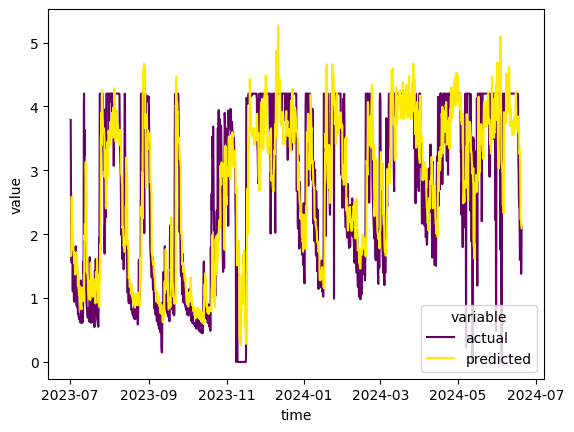

In [56]:
fig = evaluations.get_act_vs_pred_plot(y_test_rescaled, y_pred_rescaled)

In [57]:
evaluations.get_eval_metrics(y_test_rescaled, y_pred_rescaled)

{'mae': 0.5821296893090299,
 'mse': 0.6367780437679472,
 'rmse': 0.7979837365309818,
 'mape': 0.5821296893090299,
 'non-na%': 1.0,
 'n_actual_obs': 2128,
 'n_pred_nas': 0}